In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
# Read CSV into a DataFrame
csv_path = "SHR76_17.csv"
murder_df = pd.read_csv(csv_path)
murder_df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Alaska,Rural Alaska
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,Alabama,"Mobile, AL"


In [3]:
# Clean data up!
murder_weapons_series = murder_df['Weapon']

# Combine Gun categories
murder_weapons_series = murder_weapons_series.replace(to_replace=['Rifle', 'Handgun', 'Firearm', 'Shotgun', 'Other Gun', 'Handgun - pistol, revolver, etc', 'Firearm, type not stated', 'Other gun'], value='Gun')
murder_df = murder_df.assign(Weapon=murder_weapons_series)

# Combine Circumstances
murder_circumstance_series = murder_df['Circumstance']
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Other arguments', 'Argument over money or property'], value='Arguments')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Other negligent handling of gun', 'Children playing with gun', 'Gun-cleaning death - other than self', 'Victim shot in hunting accident'], value='Gun Negligence')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Rape', 'Other sex offense'], value='Sex Offense')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Circumstances undetermined', 'Other', 'Other - not specified', 'All other manslaughter by negligence', 'All suspected felony type'], value='Other')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Robbery', 'Burglary', 'Motor vehicle theft', 'Larceny'], value='Theft')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Brawl due to influence of alcohol', 'Brawl due to influence of narcotics', 'Narcotic drug laws'], value='Drug & Alcohol Related')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Gangland killings', 'Juvenile gang killings'], value='Gang Related')
murder_df = murder_df.assign(Circumstance=murder_circumstance_series)

murder_relationship_series = murder_df['Relationship']
murder_relationship_series = murder_relationship_series.replace(to_replace=['Husband', 'Wife', 'Common-law husband', 'Common-law wife'], value='Spouse')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Brother', 'Sister'], value='Sibling')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Mother', 'Father'], value='Parent')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Ex-husband', 'Ex-wife'], value='Ex')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Stepmother', 'Stepfather'], value='Stepparent')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Stepdaughter', 'Stepson'], value='Stepchild')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Boyfriend', 'Girlfriend'], value='Partner')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Relationship not determined', 'Other - known to victim'], value='Other')
murder_df = murder_df.assign(Relationship=murder_relationship_series)

In [90]:
#2. What is the relationship between relationship type and type of murder committed.
circumstance_df = pd.crosstab(murder_df.Relationship, murder_df.Circumstance)
#Remove "Other" designation to get better detail on specific rlationships and circumstances
circumstance_df = circumstance_df.drop(["Other"], axis=1)
circumstance_df = circumstance_df.drop(["Other"], axis=0)
circumstance_df.head()

Circumstance,Abortion,Arguments,Arson,Child killed by babysitter,Drug & Alcohol Related,Felon killed by police,Felon killed by private citizen,Gambling,Gang Related,Gun Negligence,Institutional killings,Lovers triangle,Prostitution and commercialized vice,Sex Offense,Sniper attack,Theft
Relationship,,,,,,,,,,,,,,,,
Acquaintance,2,70871,703,339,18222,170,1927,635,2353,1414,368,4974,159,1335,44,10523
Daughter,1,780,143,18,80,0,1,0,2,34,1,26,0,36,0,6
Employee,1,185,14,2,9,1,5,1,2,1,0,5,1,3,0,51
Employer,0,239,2,0,6,0,0,0,2,3,0,5,1,8,0,126
Ex,0,1692,7,0,48,3,50,0,1,7,2,160,0,5,1,42


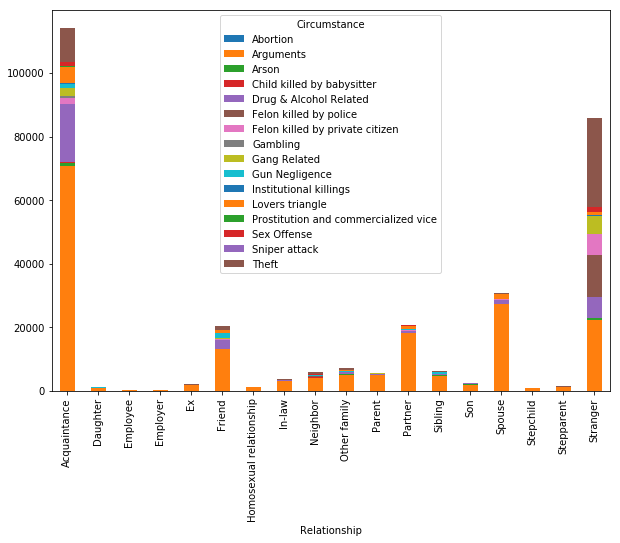

In [91]:
circumstance_df.plot.bar(stacked=True, figsize=(10,7))

In [92]:
murder_relationship_df = pd.crosstab(murder_df.Relationship, murder_df.Weapon)
murder_relationship_df

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging
Relationship,,,,,,,,,,,,,,
Acquaintance,530,7547,159,68,1183,99580,29292,0,570,3771,8489,83,67,1444
Daughter,622,437,291,22,354,1902,505,0,131,1402,3006,53,10,151
Employee,5,31,1,7,13,277,57,0,1,30,27,0,0,8
Employer,4,64,0,0,2,342,109,0,3,23,18,3,0,11
Ex,10,73,4,1,19,2516,417,0,3,76,99,2,0,41
Friend,95,1329,52,12,145,16636,5623,0,246,856,1459,10,10,282
Homosexual relationship,21,164,4,0,12,507,690,0,6,57,112,5,0,87
In-law,10,138,5,4,26,3520,782,0,7,87,169,7,1,23
Neighbor,45,521,18,4,259,4733,1711,0,6,174,422,2,3,132


In [93]:
#Remove "Other" designation to get better detail on specific rlationships and circumstances
murder_relationship_df = murder_relationship_df.drop(['Other'], axis=0)
murder_relationship_df

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging
Relationship,,,,,,,,,,,,,,
Acquaintance,530,7547,159,68,1183,99580,29292,0,570,3771,8489,83,67,1444
Daughter,622,437,291,22,354,1902,505,0,131,1402,3006,53,10,151
Employee,5,31,1,7,13,277,57,0,1,30,27,0,0,8
Employer,4,64,0,0,2,342,109,0,3,23,18,3,0,11
Ex,10,73,4,1,19,2516,417,0,3,76,99,2,0,41
Friend,95,1329,52,12,145,16636,5623,0,246,856,1459,10,10,282
Homosexual relationship,21,164,4,0,12,507,690,0,6,57,112,5,0,87
In-law,10,138,5,4,26,3520,782,0,7,87,169,7,1,23
Neighbor,45,521,18,4,259,4733,1711,0,6,174,422,2,3,132


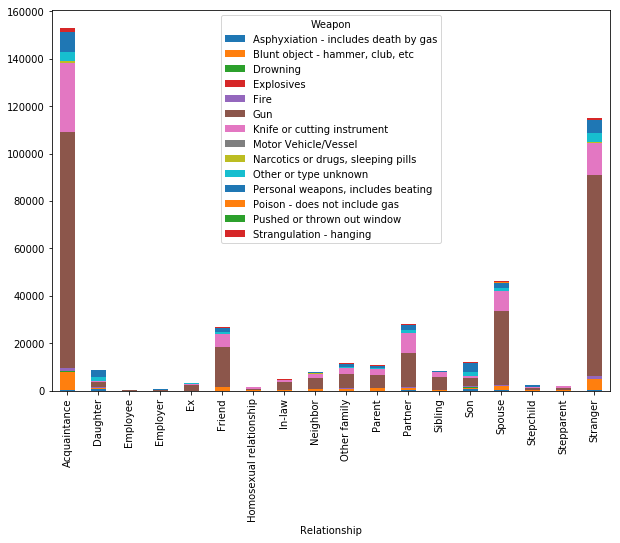

In [94]:
murder_relationship_df.plot.bar(stacked=True, figsize=(10,7))

In [95]:
circumstance_df = murder_df.groupby(['Circumstance']).size().reset_index(name='total by circ')
circumstance_df = circumstance_df.drop([12], axis=0)
total_circs = circumstance_df["total by circ"].sum()
circumstance_percentage = circumstance_df["total by circ"]/total_circs*100
circumstance_df["% of Total Circumstances"] = circumstance_percentage
circumstance_df

,Circumstance,total by circ,% of Total Circumstances
0,Abortion,10,0.002346
1,Arguments,217127,50.946655
2,Arson,4630,1.086383
3,Child killed by babysitter,1275,0.299166
4,Drug & Alcohol Related,50055,11.744900
5,Felon killed by police,16555,3.884463
6,Felon killed by private citizen,12725,2.985793
7,Gambling,1078,0.252942
8,Gang Related,28891,6.778981
9,Gun Negligence,5664,1.329000


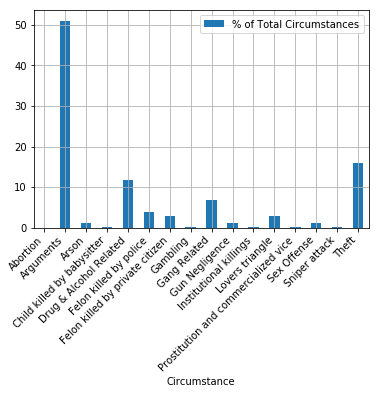

In [96]:
Circumstance = circumstance_df.index
circumstance_df.plot.bar('Circumstance','% of Total Circumstances')
plt.xticks(rotation=45, ha="right")
plt.grid()

In [ ]:
#2
#Arguments are the biggest specific circumstance for murder
#Acquaintances are the biggest specified perpetrators
#Most common weapon used, regardless of relationship, is a gun
#Homicide committed by progeny are mostly done with personal weapons (which includes beating)
#6
#Sex Offenses do not occur often in murder circumstances, outranked by drugs & alcohol, gang related crime and theft
